# Diabetes Analysis

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset.

Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Data Attributes

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

In [1]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
from sklearn.impute import KNNImputer

## Load Data

In [2]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Data Cleaning

In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
# Check for Unique Value
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [7]:
# Check for Missing Value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
# Check for Dupicate Rows
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


* There are 768 records in the dataset and 9 variables.
* There is no duplicate data or missing value data.

## Data Analysis

In [9]:
# Summary Statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Class Distribution (for binary classification problems)
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

([<matplotlib.patches.Wedge at 0x2468333a460>,
 [Text(-0.9784676515931926, -0.502594324267299, 'No Diabetes'),
  Text(0.9784676045369114, 0.5025944158780502, 'Diabetes')],
 [Text(-0.5337096281417414, -0.274142358691254, '65.1%'),
  Text(0.5337096024746789, 0.2741424086607546, '34.9%')])

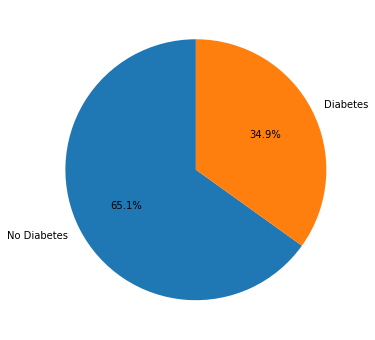

In [11]:
diabetes = df['Outcome'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(diabetes, labels=['No Diabetes', 'Diabetes'], autopct='%.1f%%', startangle=90)

* The average age is 33 years old.
* Based on outcome variabel, there is 268 people have diabetes which 34,9% of all individuals in the dataset.
* Some variables (e.g. Glucose, Bloodpressure, Skinthickness, Insulin, BMI) that have value 0 might be replace for missing value, then handling it. It is impossible for those variable to have 0 value naturally.

In [12]:
# Columns with zero value will be replaced with Nan
replace_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[replace_zeros] = df[replace_zeros].replace(0, pd.NA)

In [13]:
# Rechecking the missing value
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Handling Missing Value:
* For columns with smaller number of missing value (Glucose, BloodPressure, BMI) will be replace with median, because median is less sensitive to outliers than mean.
* For columns with larger number of missing value which almost 50% (SkinThickness, Insulin) will be using imputation method KNN, because it more appropriate.

In [14]:
# Convert pandas NA to numpy nan for compatibility
df = df.replace({pd.NA: np.NAN})

# Handling missing value for GLucose, BloodPressure and BMI with median 
df['Glucose']= df['Glucose'].fillna(df['Glucose'].median())
df['BloodPressure']= df['BloodPressure'].fillna(df['BloodPressure'].median())
df['BMI']= df['BMI'].fillna(df['BMI'].median())
df.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [15]:
# Handling missing value for SkinThickness and Insulin with KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
df[['SkinThickness','Insulin']] = knn_imputer.fit_transform(df[['SkinThickness','Insulin']])
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Data Visualization

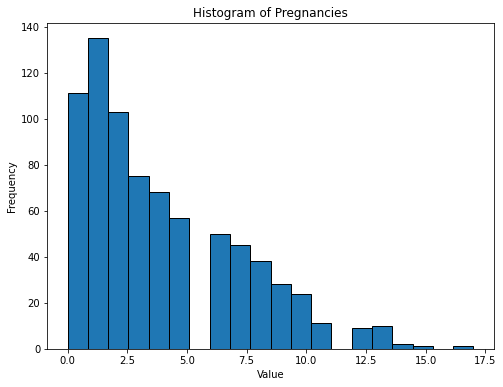

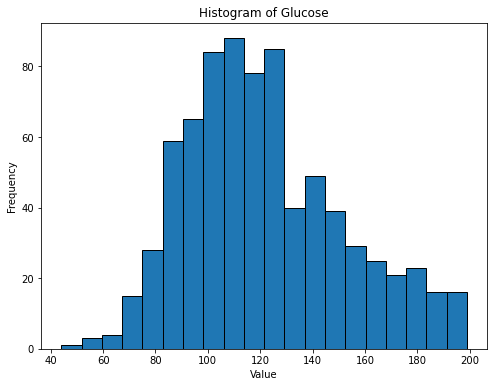

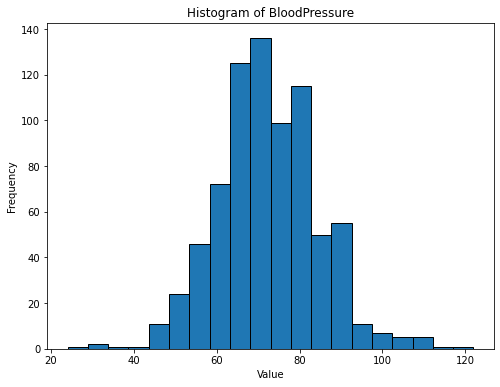

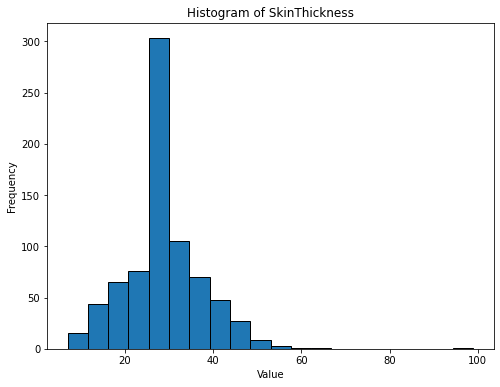

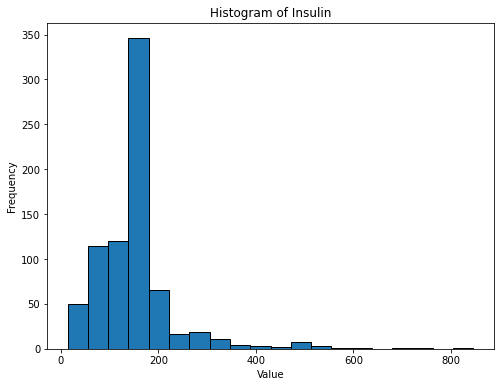

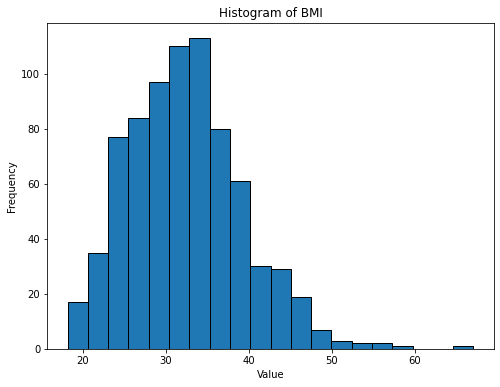

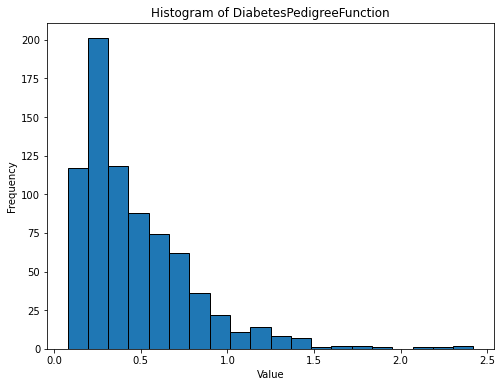

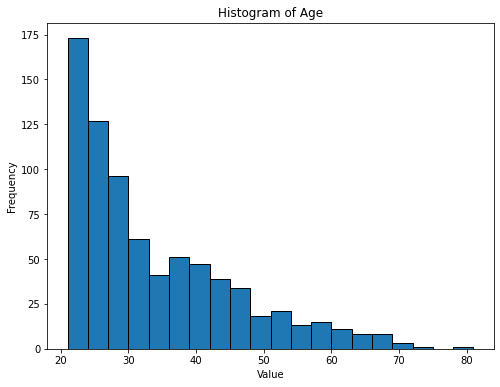

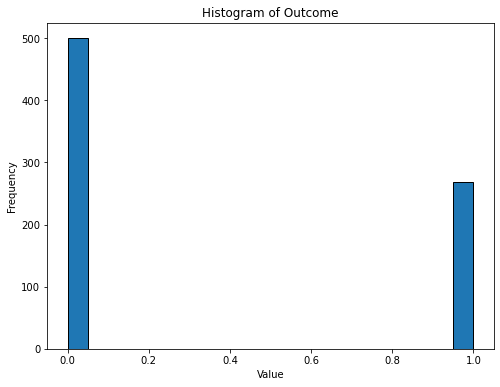

In [16]:
num_bins = 20
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=num_bins, edgecolor='k')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()

Histogram Overview :
* Pregnancies: The distribution of pregnancies is skewed to the right, with the majority of individuals having had 0-2 pregnancies.
* Glucose: The Glucose histogram is roughly bell-shaped, it suggests a normal distribution.
* BloodPressure: The distributin of BloodPressure slightly normal.
* SkinThickness: There is a peak in the histogram representing the most common skin thickness in the group, also known as the mode.
* Insulin: Most individuals have insulin levels under 200, with only a few having levels higher than 200.
* BMI: The distribution of BMI is slightly normal.
* DiabetesPedigreeFunction: The distribution of the histogram shows that most of the data are on the lower side, indicating that each individual has a small history of diabetes. 
* Age: The Age histogram is skewed to the right (positively skewed), it means there are fewer older individuals, and most people in the group are younger.
* Outcome: It show that Outcome only have two value : 0 (No Diabetes) and 1 (Diabetes)

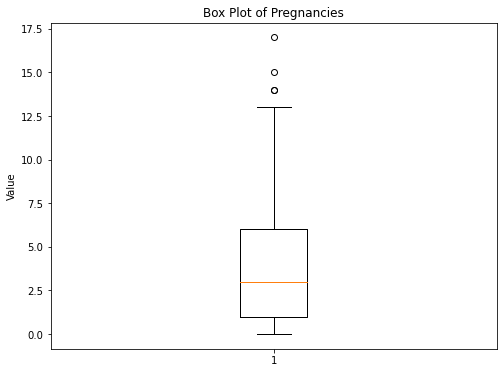

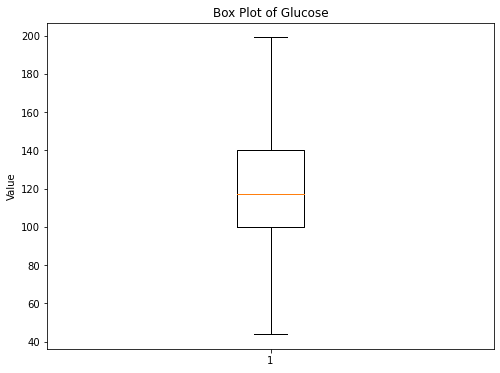

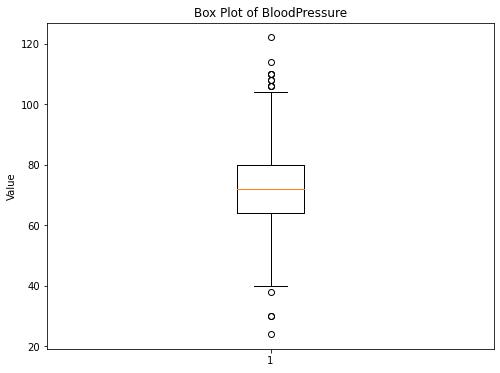

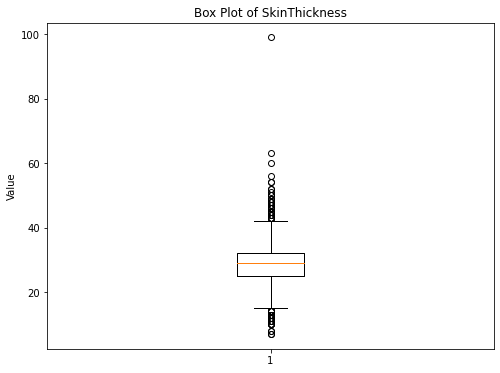

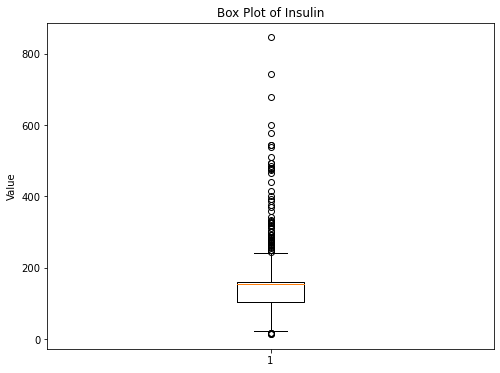

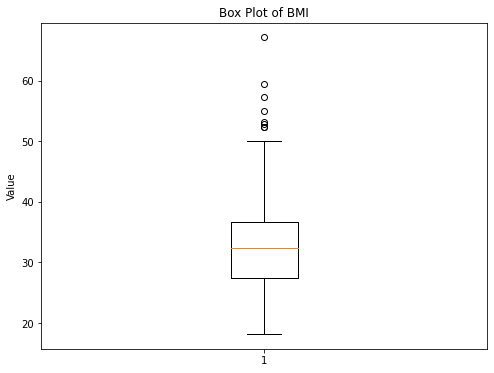

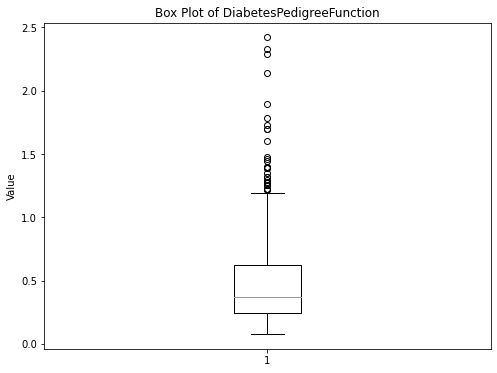

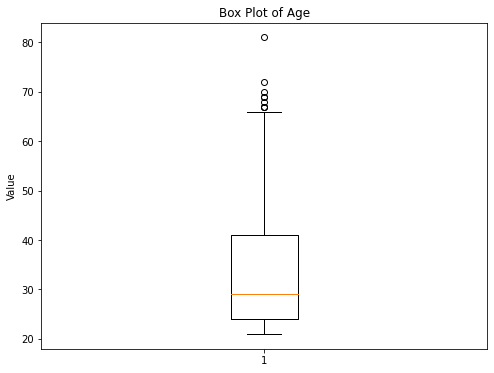

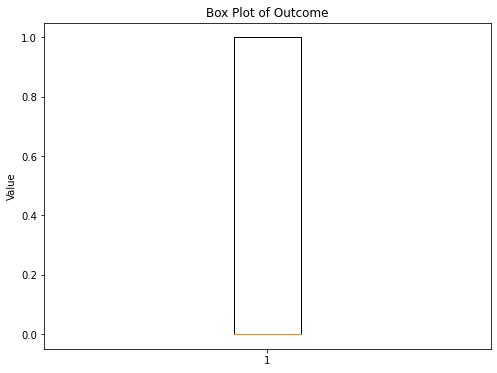

In [17]:
# Checking for the outlier
for column in df.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Value')
    plt.show()

Boxplot Overview : Some of the variables are detected having outliers.

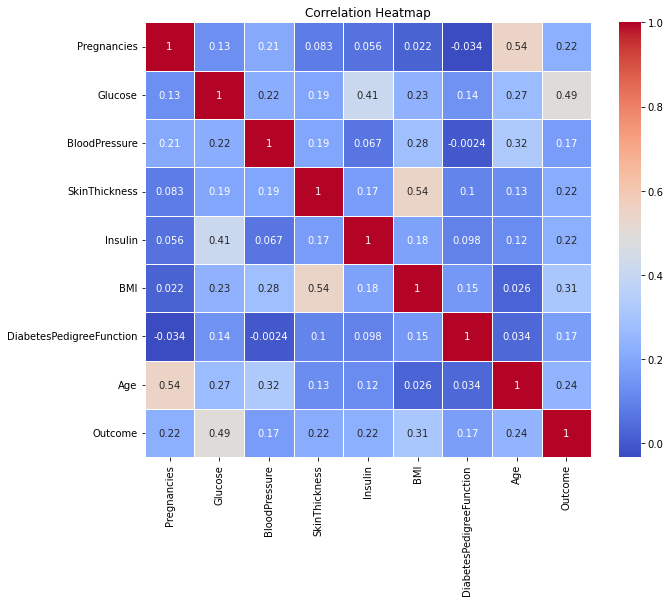

In [18]:
# Multivariate Analysis
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

Heatmap Overview:
* Age and pregnancies exhibit a positive correlation, which makes sense, as age increases, the number of pregnancies a woman might have typically increases.
* Glucose shows a positive correlation with the outcome, which is understandable, as higher glucose levels can lead to diabetes.
* SkinThickness shows a positive correlation with the BMI, skin layers became progressively thicker with increasing BMI.
* None of the variable pairs display excessively high correlations, which is favorable in the context of multicollinearity, especially if we were to construct a predictive model.